# Starlink vs Hardwired: Measuring connectivity to the cloud

## Measurements Methodology

### Measurement Tool

RIPE Atlas was chosen as the measurement platform. It has several Starlink based probes as well as several hardwired probes that are connected to the platform ready to provide network measurements.

### Targets Selection

Datacenters from the 3 most popular cloud service providers, Amazon, Microsoft, and Google, were chosen as targets all over the world. There are several targets that meet this criteria across various countries. To make things simpler, countries that have all three of these providers operating in them were chosen. Given the initial set of data provided, this resulted in 33 targets situated in 11 countries across 5 regions:

North America: Canada, USA

South America: Brazil

Europe: Germany, United Kingdom

Asia: Hong Kong, India, Japan, Singapore, South Korea

Oceania: Australia

### Probes Selection

RIPE Atlas provides us the ability to filter and view Starlink based probes via its API based on ASNs. Using this API, a total of 65 Starlink based probes(ASN 14593) were fetched - https://atlas.ripe.net/api/v2/probes/?asn=14593. Of these 65, 50 probes were requested for each measurement. These probes were from 13 different countries. A region specific breakdown of these probes can be found below.

As part of the comparative study, an equal number of 50 probes connected to the internet via hardwired connectivity were also requested and a similar 1:1 country specific choice was applied to preserve consistency in measurements.

North America: 26 Probes

Europe: 20 Probes

Oceania: 4 Probes

### Measurements

Each datacenter was targeted by all 100 requested probes. One-off Ping and Traceroute measurements were performed from the probes to the datacenter. Datacenter IP Addresses were resolved prior to running the measurements to reduce latency caused by hostname to IP address lookups.

## Results

Measurements results were fetched using the RIPE Atlas API. Results were then fed into the RIPE Atlas Sagan library which allows us to parse them and derive useful data such as Median RTT, Average RTT, Total Hops, etc.

As part of this short study, a small set of both latency and hop-count based results will be presented. Also, due to the vast amount of data in hand and given that there are ~3300 results for each measurement, findings will be limited to some countries and regions.

Measurements findings for regions like South America and Asia in particular have not been shown as part of these results. Both these regions do not have any active Starlink probe presence within the RIPE Atlas network. As such, data suggests high overall latency and hop-count values for all probes targetting cloud datacenters in these regions.

### Cloud Connectivity: Latency

This section will focus on latency results based on general connectivity to cloud providers across some regions. One random datacenter was chosen from the North America, and Oceania regions. Lowest RTTs and average RTTs from both Starlink and Hardwired probes located in the same regions to this target were gathered.

#### Latency Performance: North America

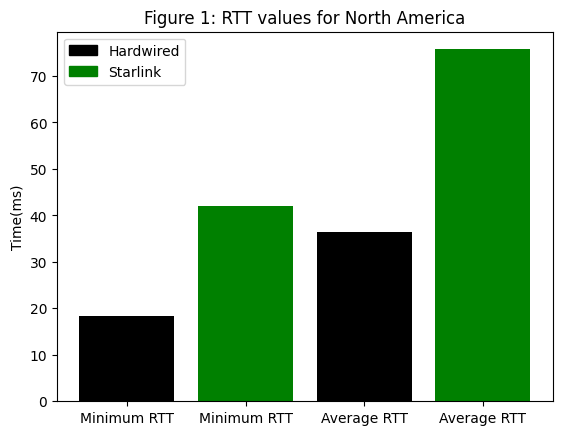

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

na_ms = [18.31, 42.08, 36.45, 75.75]
na_rtt = ['Minimum RTT', 'Minimum RTT', 'Average RTT', 'Average RTT']
x_pos = np.arange(len(na_rtt))
plt.bar(x_pos, na_ms, color=['black', 'green', 'black', 'green'])
plt.xticks(x_pos, na_rtt)
plt.ylabel('Time(ms)')
plt.title('Figure 1: RTT values for North America')
black_patch = mpatches.Patch(color='black', label='Hardwired')
green_patch = mpatches.Patch(color='green', label='Starlink')
plt.legend(handles=[black_patch, green_patch])
plt.show()

This region (NA) in particular has a high concentration of probes (~50%) used in our measurements. Results show better RTT performance from Hardwired probes compared to Starlink probes. Nevertheless, cloud connectivity from Starlink connections remains reasonable with average RTT values below ~80ms.

#### Latency Performance: Oceania

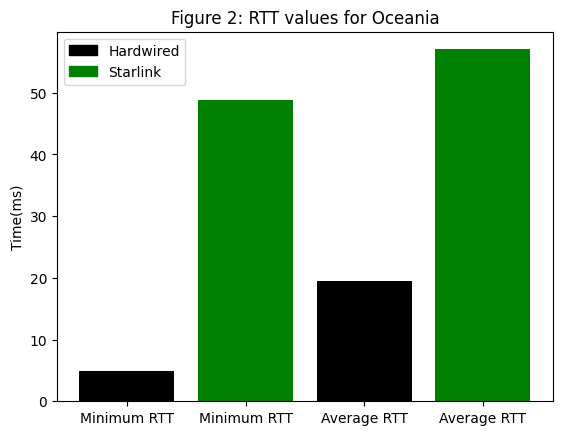

In [2]:
oc_ms = [4.97, 48.88, 19.43, 57.05]
oc_rtt = ['Minimum RTT', 'Minimum RTT', 'Average RTT', 'Average RTT']
x_pos = np.arange(len(oc_rtt))
plt.bar(x_pos, oc_ms, color=['black', 'green', 'black', 'green'])
plt.xticks(x_pos, oc_rtt)
plt.ylabel('Time(ms)')
plt.title('Figure 2: RTT values for Oceania')
black_patch = mpatches.Patch(color='black', label='Hardwired')
green_patch = mpatches.Patch(color='green', label='Starlink')
plt.legend(handles=[black_patch, green_patch])
plt.show()

This region was chosen in contrast to NA with respect to probe coverage (~12%). Results are along similar lines wherein Hardwired performance is better than Starlink performance. It is to be noted that overall Starlink connectivity remains reasonable with average RTT values well below ~70ms.

### Cloud Connectivity: Hop-count

This section will focus on hop-count results to cloud providers in both Germany and Australia. One random datacenter was chosen from both the regions. Averaged total hops from both Starlink and Hardwired probes located in the same regions to this target were gathered.

#### Hop-counts: Germany

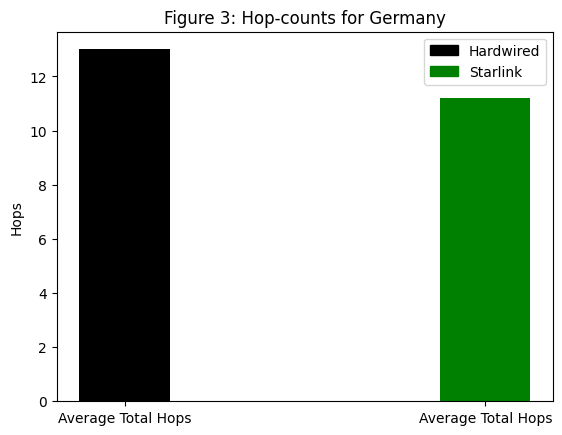

In [3]:
de_hops = ['Average Total Hops', 'Average Total Hops']
de_num = [13, 11.2]
x_pos = np.arange(len(de_hops))
plt.bar(x_pos, height = de_num, width = 0.25, color=['black', 'green'])
plt.xticks(x_pos, de_hops)
plt.ylabel('Hops')
plt.title('Figure 3: Hop-counts for Germany')
black_patch = mpatches.Patch(color='black', label='Hardwired')
green_patch = mpatches.Patch(color='green', label='Starlink')
plt.legend(handles=[black_patch, green_patch])
plt.show()

Hop-count results in Germany show a very small difference between Hardwired and Starlink connections with the latter having a lower average count.

Figure shown below is a TraceMon path trace for the probes involved in this measurement. The Starlink probes have been marked explicitly with a red outline.

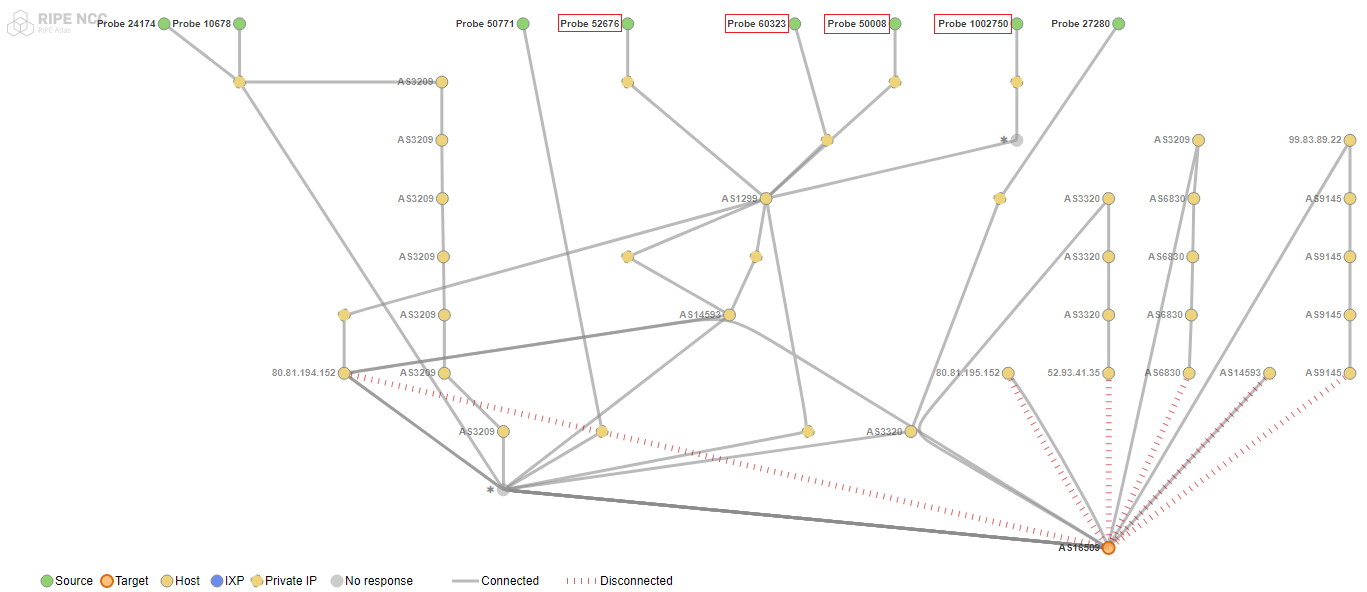

In [4]:
from IPython.display import Image
img = "./Result_3_TraceMON.png"
Image(filename = img, width=1367, height=592)

#### Hop-counts: Australia

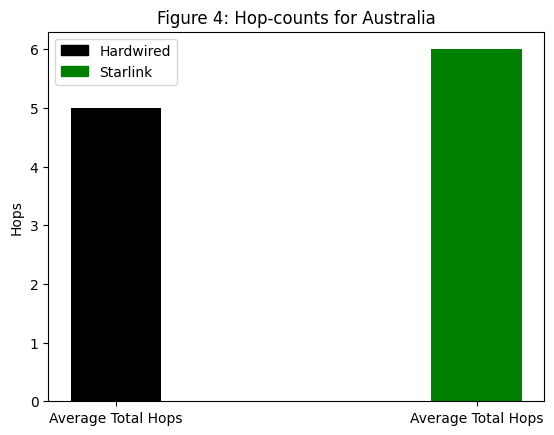

In [5]:
au_num = [5, 6]
au_hops = ['Average Total Hops', 'Average Total Hops']
x_pos = np.arange(len(au_hops))
plt.bar(x_pos, height = au_num, width = 0.25, color=['black', 'green'])
plt.xticks(x_pos, au_hops)
plt.ylabel('Hops')
plt.title('Figure 4: Hop-counts for Australia')
black_patch = mpatches.Patch(color='black', label='Hardwired')
green_patch = mpatches.Patch(color='green', label='Starlink')
plt.legend(handles=[black_patch, green_patch])
plt.show()

Hop-count results in Australia also show a very small difference between Hardwired and Starlink connections with the former showing slightly lower overall count.

Figure shown below is a TraceMon path trace for the probes involved in this measurement. The Starlink probes have been marked explicitly with a red outline.

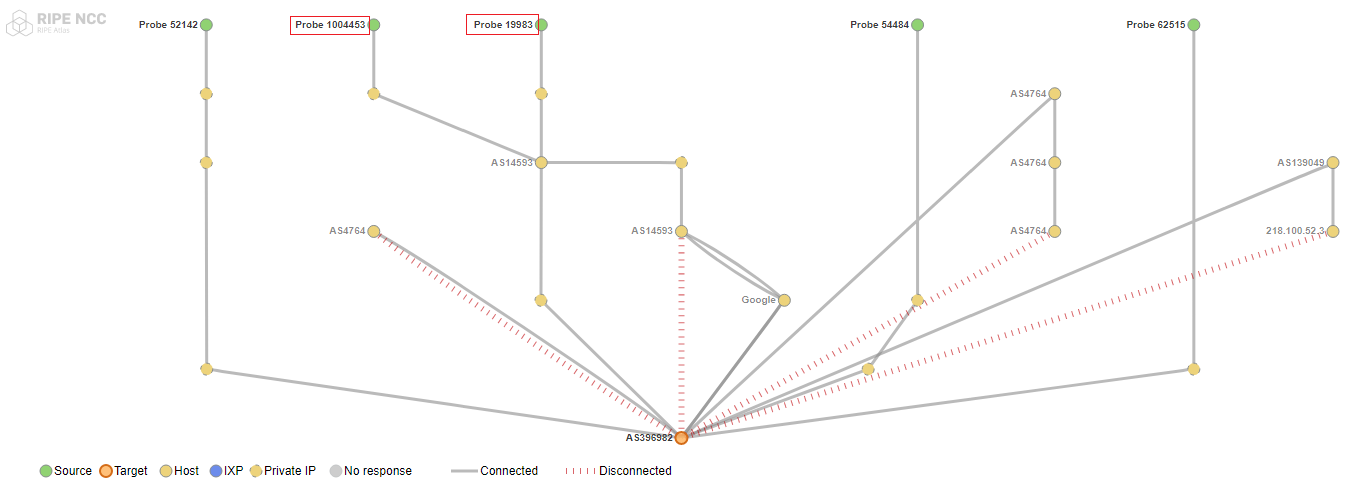

In [6]:
img = "./Result_4_TraceMON.png"
Image(filename = img, width=1353, height=483)

## Data and Files

All measurement data and scripts can be found here - https://github.com/krthknrmnch/Starlink_Vs_Hardwired_RIPE_Atlas/tree/one_off

Latency and Hop-count values were generated using RIPE Atlas' Sagan library. The library can be installed with ***pip***:

    pip install ripe.atlas.sagan

After installation, please run ***sagan_cloud_connectivity.py*** located in /Analysis to reproduce values presented above.